In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import numpy as np

In [5]:
read_file = pd.read_csv(r'seeds_dataset.txt', sep='\t')
read_file.to_csv(r'seeds_dataset.csv', index=None)

dataseed = pd.read_csv('seeds_dataset.csv')
y = dataseed.Clase
normalizar = StandardScaler()
x = normalizar.fit_transform(dataseed.iloc[:,:-1])

AttributeError: 'DataFrame' object has no attribute 'Clase'

In [3]:
K = 10
cv_strat = StratifiedKFold(n_splits=K, shuffle=True)

In [4]:
max_clusters = 50
min_clusters = np.unique(y).shape[0]
k = []
for i in range(min_clusters, max_clusters+1):
    k.append(str(i))
tabla = pd.DataFrame(columns=k, data=np.zeros((K, max_clusters-min_clusters+1), dtype=float))
tabla.columns.name = "Clusters"
tabla.index.name = "CV"

for c in k:
    kmedias = KMeans(n_clusters=int(c), random_state=0)
    cv = 0
    for train_index, test_index in cv_strat.split(x,y):
        x_train = x[train_index]
        y_train = y[train_index]
        x_test = x[test_index]
        y_test = y[test_index]
        kmedias.fit(x_train)
        moda = -1 * np.ones(int(c), dtype='int')
        
        for i in range(int(c)):
            moda[i] = mode(y_train[kmedias.labels_ == i])[0].astype(int)
        y_test_predict = moda[kmedias.predict(x_test)]
        tabla.loc[cv,c] = accuracy_score(y_test, y_test_predict)
        cv += 1
tabla

Clusters         3         4         5         6         7         8  \
CV                                                                     
0         0.809524  0.952381  0.952381  0.809524  0.904762  0.904762   
1         0.904762  0.904762  0.904762  0.857143  1.000000  0.761905   
2         0.904762  0.952381  0.761905  0.809524  0.904762  0.952381   
3         0.952381  0.904762  0.904762  0.904762  0.904762  0.857143   
4         1.000000  0.952381  0.809524  0.904762  0.904762  0.809524   
5         1.000000  0.952381  0.952381  0.904762  0.904762  0.952381   
6         0.857143  0.904762  0.761905  0.952381  0.761905  0.857143   
7         0.761905  0.809524  0.904762  0.857143  0.857143  0.904762   
8         0.952381  0.809524  0.857143  0.809524  0.857143  0.857143   
9         0.904762  0.809524  0.952381  1.000000  0.809524  0.904762   

Clusters         9        10        11        12  ...        41        42  \
CV                                                ...                       
0         0.952381  0.809524  0.952381  0.952381  ...  0.952381  0.952381   
1         0.904762  0.857143  0.714286  0.904762  ...  0.952381  0.761905   
2         0.904762  1.000000  0.904762  0.904762  ...  0.857143  0.857143   
3         0.809524  0.904762  1.000000  1.000000  ...  0.904762  0.857143   
4         0.904762  0.857143  0.809524  0.904762  ...  0.952381  0.857143   
5         0.904762  1.000000  0.904762  0.904762  ...  0.952381  0.952381   
6         0.952381  0.857143  0.952381  0.857143  ...  0.761905  0.857143   
7         0.904762  0.809524  0.809524  0.952381  ...  0.904762  0.952381   
8         0.952381  0.857143  0.952381  0.904762  ...  0.904762  0.904762   
9         0.952381  0.952381  0.904762  0.761905  ...  0.809524  0.904762   

Clusters        43        44        45        46        47        48  \
CV                                                                     
0         0.952381  0.952381  0.857143  0.857143  0.952381  1.000000   
1         1.000000  0.904762  0.904762  0.904762  0.857143  0.952381   
2         0.857143  0.904762  0.904762  0.857143  0.952381  0.857143   
3         0.904762  0.857143  0.809524  0.952381  0.857143  0.952381   
4         0.809524  0.809524  0.809524  0.857143  0.904762  0.857143   
5         0.857143  0.857143  0.904762  0.904762  0.857143  0.904762   
6         0.904762  0.952381  0.857143  0.952381  0.714286  0.857143   
7         0.952381  0.809524  0.952381  0.857143  0.952381  0.904762   
8         0.904762  0.952381  0.904762  1.000000  0.904762  0.952381   
9         0.952381  0.904762  0.857143  0.857143  0.952381  0.952381   

Clusters        49        50  
CV                            
0         0.952381  0.857143  
1         0.904762  0.904762  
2         0.952381  0.952381  
3         0.952381  0.952381  
4         0.809524  0.904762  
5         0.904762  0.952381  
6         0.952381  0.904762  
7         1.000000  0.952381  
8         0.857143  0.857143  
9         0.952381  0.904762  

[10 rows x 48 columns]

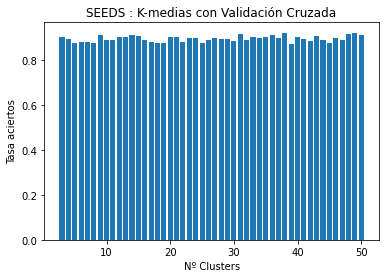

In [5]:
import matplotlib
import matplotlib.pyplot as plt
plt.bar(np.arange(min_clusters,max_clusters+1, dtype='int'), tabla.mean(axis=0))
plt.title("SEEDS : K-medias con Validación Cruzada")
plt.xlabel("Nº Clusters")
plt.ylabel("Tasa aciertos")
plt.show()

In [6]:
print("El valor de K más óptimo es:", tabla.columns[tabla.mean(axis=0).argmax()], "que da una tasa de acierto de:", tabla.mean(axis=0).max())

El valor de K más óptimo es: 49 que da una tasa de acierto de: 0.9238095238095239
